In [1]:
import pandas as pd
import h5py
import numpy as np
from tqdm import tqdm

In [2]:
train_df = pd.read_csv("C:/Users/김승우/Desktop/파이썬/dacon/3D MNIST Classification/train.csv")
train_df.head()

,ID,label
0,0,5
1,1,0
2,2,4
3,3,1
4,4,9


In [3]:
sub_df = pd.read_csv("C:/Users/김승우/Desktop/파이썬/dacon/3D MNIST Classification/sample_submission.csv")
sub_df.head()

,ID,label
0,50000,-1
1,50001,-1
2,50002,-1
3,50003,-1
4,50004,-1


In [4]:
train_all = h5py.File("C:/Users/김승우/Desktop/파이썬/dacon/3D MNIST Classification/train.h5", 'r')

In [15]:
train_all= [np.array(train_all[str(i)]) for i in tqdm(train_df["ID"][0:500])]

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 480.19it/s]


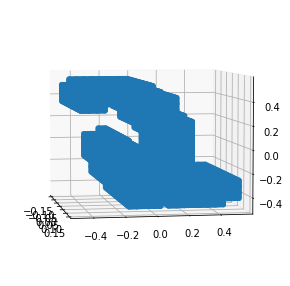

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax0 = fig.add_subplot(111, projection="3d")

idx = 400

x = train_all[idx][:, 0]
y = train_all[idx][:, 1]
z = train_all[idx][:, 2]

ax0.view_init(5, -10)
# ax0.view_init(0, 0)
ax0.scatter(x, y, z)

In [17]:
def rotate(a, b, c, dots):
    mx = np.array([[1, 0, 0], [0, np.cos(a), -np.sin(a)], [0, np.sin(a), np.cos(a)]])
    my = np.array([[np.cos(b), 0, np.sin(b)], [0, 1, 0], [-np.sin(b), 0, np.cos(b)]])
    mz = np.array([[np.cos(c), -np.sin(c), 0], [np.sin(c), np.cos(c), 0], [0, 0, 1]])
    m = np.dot(np.dot(mx,my),mz)
    dots = np.dot(dots, m.T)
    return dots

dots = train_all[400]
new_dots = rotate(-np.pi/4, 0, 0, dots)

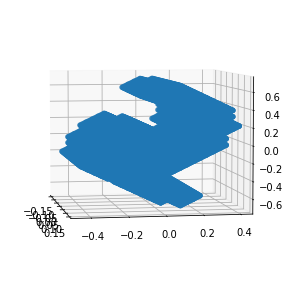

In [18]:
fig = plt.figure(figsize=(5, 5))
ax0 = fig.add_subplot(111, projection="3d")

x = new_dots[:, 0]
y = new_dots[:, 1]
z = new_dots[:, 2]

ax0.view_init(5, -10)
ax0.scatter(x, y, z)

In [32]:
new_data=[]

In [33]:
for i in train_df["ID"][0:500] :
    new_data.append(rotate(-np.pi/2,0,0,train_all[i]))
    

In [34]:
new_data

[array([[ 0.15      ,  0.47305447,  0.1094358 ],
        [ 0.15      ,  0.47305447,  0.0969358 ],
        [ 0.15      ,  0.47305447,  0.0844358 ],
        ...,
        [ 0.15      , -0.50194553,  0.1094358 ],
        [ 0.15      , -0.51444553,  0.1094358 ],
        [ 0.15      , -0.52694553,  0.1094358 ]]),
 array([[ 0.15      ,  0.52146947, -0.02270992],
        [ 0.15      ,  0.52146947, -0.03520992],
        [ 0.15      ,  0.52146947, -0.04770992],
        ...,
        [ 0.15      , -0.45353053,  0.02729008],
        [ 0.15      , -0.46603053,  0.02729008],
        [ 0.15      , -0.47853053,  0.02729008]]),
 array([[ 0.15      ,  0.44845238, -0.30547619],
        [ 0.15      ,  0.44845238, -0.31797619],
        [ 0.15      ,  0.44845238, -0.33047619],
        ...,
        [ 0.15      , -0.52654762, -0.30547619],
        [ 0.15      , -0.53904762, -0.30547619],
        [ 0.15      , -0.55154762, -0.30547619]]),
 array([[ 0.15      ,  0.48833333, -0.16466667],
        [ 0.15      ,  0

In [59]:
hf=h5py.File('train_all_1.h5','w')

In [60]:
for i in train_df["ID"][0:500] :
    hf.create_dataset('data_{}'.format(i), data=new_data[i])

In [61]:
hf.close()

In [62]:
check=h5py.File("train_all_1.h5", 'r')

In [65]:
check= [np.array(check['data_{}'.format(i)]) for i in tqdm(train_df["ID"][0:500])]


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1444.77it/s]


In [64]:
check.keys()

<KeysViewHDF5 ['data_0', 'data_1', 'data_10', 'data_100', 'data_101', 'data_102', 'data_103', 'data_104', 'data_105', 'data_106', 'data_107', 'data_108', 'data_109', 'data_11', 'data_110', 'data_111', 'data_112', 'data_113', 'data_114', 'data_115', 'data_116', 'data_117', 'data_118', 'data_119', 'data_12', 'data_120', 'data_121', 'data_122', 'data_123', 'data_124', 'data_125', 'data_126', 'data_127', 'data_128', 'data_129', 'data_13', 'data_130', 'data_131', 'data_132', 'data_133', 'data_134', 'data_135', 'data_136', 'data_137', 'data_138', 'data_139', 'data_14', 'data_140', 'data_141', 'data_142', 'data_143', 'data_144', 'data_145', 'data_146', 'data_147', 'data_148', 'data_149', 'data_15', 'data_150', 'data_151', 'data_152', 'data_153', 'data_154', 'data_155', 'data_156', 'data_157', 'data_158', 'data_159', 'data_16', 'data_160', 'data_161', 'data_162', 'data_163', 'data_164', 'data_165', 'data_166', 'data_167', 'data_168', 'data_169', 'data_17', 'data_170', 'data_171', 'data_172', '

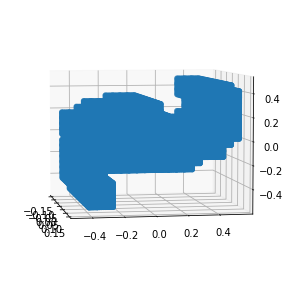

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax0 = fig.add_subplot(111, projection="3d")

idx = 400

x = check[idx][:, 0]
y = check[idx][:, 1]
z = check[idx][:, 2]

ax0.view_init(5, -10)
# ax0.view_init(0, 0)
ax0.scatter(x, y, z)